In [ ]:
%env DISABLE_PROGRESS_BAR=True

In [42]:
import json
import numpy as np
from shapely.geometry import shape, box, GeometryCollection, Polygon
from shapely.affinity import scale
from packer import IrregularPackerStrictGBFLS, CirclePackerBeeLS, CirclePackerBee, CirclePackerBeeStrict, CirclePackerPSO, IrregularPacker, IrregularPackerGridBF, IrregularPackerGBFLS, IrregularPackerPSO, CirclePackerBeeStrictLS, CirclePackerStrictPSO, IrregularPackerStrictGridBF, IrregularPackerStrictPSO, IrregularPackerPSOLS, IrregularPackerStrictPSOLS, CirclePackerPSOLS, CirclePackerStrictPSOLS

In [3]:
container = box(-2, -2, 4, 2)

In [4]:
with open('../shapes/random_polygons.json', 'r') as f:
    shapes = json.load(f)
    shapes = [shape(s) for s in shapes]

In [5]:
radius = 0.5

In [ ]:
packer = IrregularPackerStrictGBFLS(container, shapes, n_rotations=1, n_search=10)
df = packer.pack()
GeometryCollection([container, *df['item']])

# Relaxed Circle Packing - Rectangular container

In [5]:
%%time
packer = CirclePackerBee(container, radius)
df = packer.pack()

CPU times: user 12.7 ms, sys: 1.23 ms, total: 14 ms
Wall time: 13.7 ms


In [ ]:
print('Number of circles:', len(df), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df['item']])

In [ ]:
%%time
packer = CirclePackerBeeLS(container, radius, n_search=10)
df = packer.pack()

In [ ]:
print('Number of circles:', len(df), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df['item']])

In [13]:
%%time
packer = CirclePackerBeeLS(container, radius, n_search=1000)
df = packer.pack()

Finished first optimization step
CPU times: user 1min 18s, sys: 921 ms, total: 1min 19s
Wall time: 1min 20s


In [ ]:
print('Number of circles:', len(df), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df['item']])

In [ ]:
%%time
packer = CirclePackerPSO(container, radius)
packer.pack()

In [ ]:
print('Number of circles:', len(packer.global_optimum_position), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([container, *packer.global_optimum_position['item']])

In [ ]:
%%time
packer = CirclePackerPSO(container, radius, n_circle_iter=15)
packer.pack()

In [ ]:
print('Number of circles:', len(packer.global_optimum_position), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([container, *packer.global_optimum_position['item']])

In [ ]:
%%time
packer = CirclePackerPSO(container, radius, n_circle_iter=4, n_particles=20, n_iterations=30)
packer.pack()

In [ ]:
print('Number of circles:', len(packer.global_optimum_position), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([container, *packer.global_optimum_position['item']])

In [ ]:
%%time
packer = CirclePackerPSO(container, radius, n_circle_iter=15, n_particles=20, n_iterations=30)
packer.pack()

In [ ]:
print('Number of circles:', len(packer.global_optimum_position), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([container, *packer.global_optimum_position['item']])

In [ ]:
%%time
packer = CirclePackerPSOLS(container, radius, n_circle_iter=4, n_particles=20, n_iterations=30)
packer.pack()

In [ ]:
print('Number of circles:', len(packer.global_optimum_position), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([container, *packer.global_optimum_position['item']])

In [ ]:
%%time
packer = CirclePackerPSOLS(container, radius, n_circle_iter=15, n_particles=20, n_iterations=30)
packer.pack()

In [ ]:
print('Number of circles:', len(packer.global_optimum_position), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([container, *packer.global_optimum_position['item']])

# Relaxed Irregular Score

In [58]:
%%time
packer = IrregularPackerGridBF(container, shapes, n_rotations=1, n_neighbors=12, step_portion=16)
df = packer.pack()

CPU times: user 2.25 s, sys: 25.6 ms, total: 2.27 s
Wall time: 2.52 s


In [ ]:
print('Number of pieces:', len(df), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df['item']])

In [ ]:
%%time
packer = IrregularPackerGBFLS(container, shapes, n_rotations=1, n_neighbors=12, step_portion=16, n_search=50)
df = packer.pack()

In [ ]:
print('Number of pieces:', len(df), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df['item']])

In [ ]:
%%time
packer = IrregularPackerPSO(container, shapes, n_particles=10, n_iterations=10)
packer.pack()

In [ ]:
print('Number of pieces:', len(packer.global_optimum_position), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([container, *packer.global_optimum_position['item']])

In [ ]:
%%time
packer = IrregularPackerPSOLS(container, shapes, n_particles=10, n_iterations=10)
packer.pack()

In [ ]:
print('Number of pieces:', len(packer.global_optimum_position), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([container, *packer.global_optimum_position['item']])

# Strict Circles Score

In [7]:
%%time
packer = CirclePackerBeeStrict(container, radius, intersection_threshold=40, n_neighbors=8, shots=5)
df = packer.pack()

CPU times: user 9.24 s, sys: 106 ms, total: 9.35 s
Wall time: 9.63 s


Number of circles: 22 - Score: 0.28


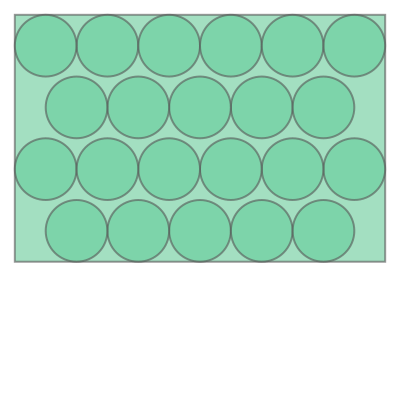

In [8]:
print('Number of circles:', len(df), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df['item']])

In [ ]:
%%time
packer = CirclePackerBeeStrictLS(container, radius, intersection_threshold=40, n_neighbors=8, shots=5, n_search=100)
df = packer.pack()

Number of circles: 22 - Score: 0.28


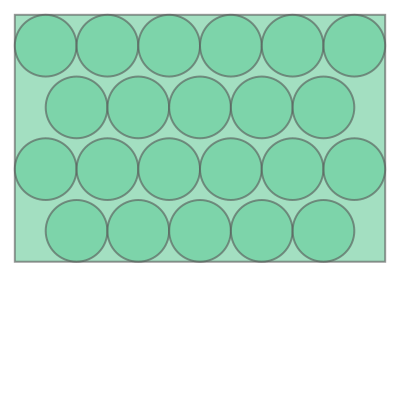

In [10]:
print('Number of circles:', len(df), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df['item']])

In [ ]:
%%time
packer = CirclePackerStrictPSO(container, radius, w=0.5)
packer.pack()

Number of circles: 9 - Score: 0.705


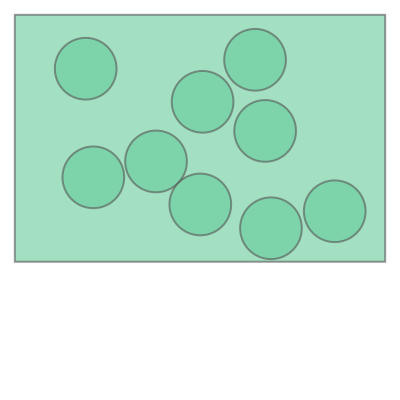

In [16]:
_packer = packer.get_packer()
df = _packer.drop_external(packer.global_optimum_position.copy())
_packer.drop_intersected(df)
print('Number of circles:', len(df), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([container, *df['item']])

In [ ]:
%%time
packer = CirclePackerStrictPSO(container, radius, w=0.5, n_circle_iter=15)
packer.pack()

Number of circles: 10 - Score: 0.673


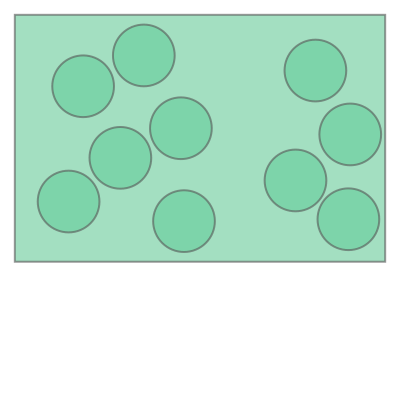

In [30]:
_packer = packer.get_packer()
df = _packer.drop_external(packer.global_optimum_position.copy())
_packer.drop_intersected(df)
print('Number of circles:', len(df), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([container, *df['item']])

In [ ]:
%%time
packer = CirclePackerStrictPSOLS(container, radius, w=0.5)
packer.pack()

Number of circles: 9 - Score: 0.705


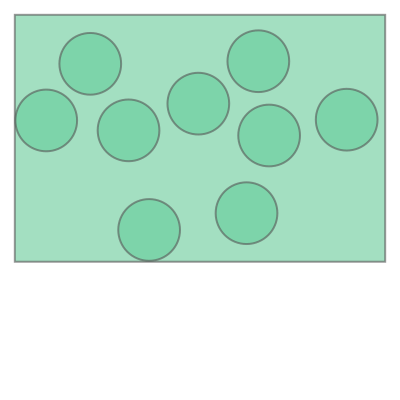

In [18]:
_packer = packer.get_packer()
df = _packer.drop_external(packer.global_optimum_position.copy())
_packer.drop_intersected(df)
print('Number of circles:', len(df), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([container, *df['item']])

In [ ]:
%%time
packer = CirclePackerStrictPSOLS(container, radius, w=0.5, n_circle_iter=15)
packer.pack()

Number of circles: 14 - Score: 0.542


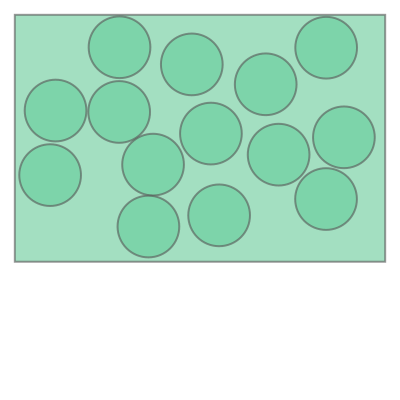

In [6]:
_packer = packer.get_packer()
df = _packer.drop_external(packer.global_optimum_position.copy())
_packer.drop_intersected(df)
print('Number of circles:', len(df), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([container, *df['item']])

# Strict Irregular Score

In [25]:
%%time
packer = IrregularPackerStrictGridBF(container, shapes, n_neighbors=10, step_portion=16, queue_length=20)
df = packer.pack()

CPU times: user 5min 3s, sys: 3.52 s, total: 5min 6s
Wall time: 5min 11s


Number of included items: 60 - Score: 0.687


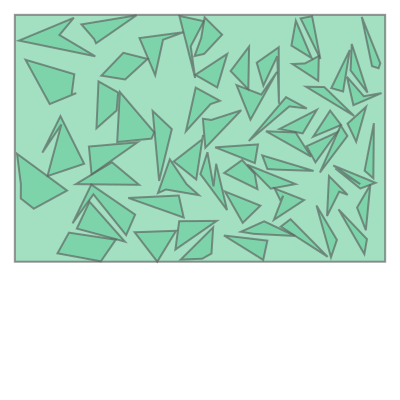

In [26]:
print('Number of included items:', len(df), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df['item']])

In [ ]:
%%time
packer = IrregularPackerStrictGBFLS(container, shapes, n_neighbors=10, step_portion=16, queue_length=20,
                                    n_search=1000)
df = packer.pack()

Finished first optimization step


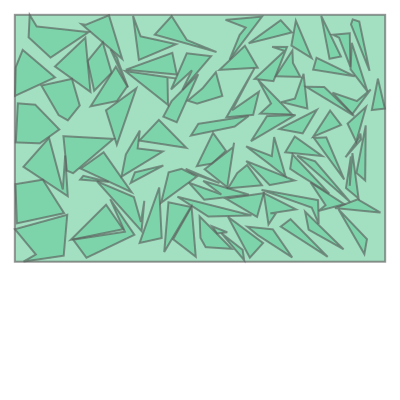

In [6]:
print('Number of included items:', len(df), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df['item']])

In [27]:
print('Number of included items:', 85, '- Score:', round(0.5877, 3))

Number of included items: 85 - Score: 0.588


In [ ]:
%%time
packer = IrregularPackerStrictPSO(container, shapes, w=0.5)
packer.pack()

Number of items: 26 - Score: 0.781


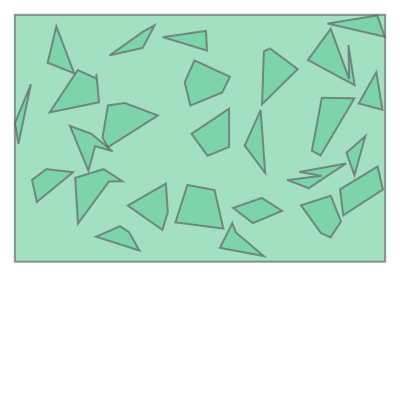

In [20]:
_packer = packer.get_packer()
df = _packer.drop_external(packer.global_optimum_position.copy())
_packer.drop_intersected(df)
print('Number of items:', len(df), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([container, *df['item']])

In [ ]:
%%time
packer = IrregularPackerStrictPSOLS(container, shapes, w=0.5)
packer.particle_packer = IrregularPacker
packer.pack()

Number of items: 30 - Score: 0.785


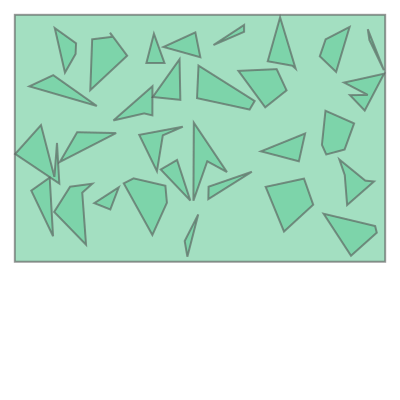

In [22]:
_packer = packer.get_packer()
df = _packer.drop_external(packer.global_optimum_position.copy())
_packer.drop_intersected(df)
print('Number of items:', len(df), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([container, *df['item']])

In [ ]:
%%time
packer = IrregularPackerStrictPSOLS(container, shapes, w=0.5)
packer.particle_packer = IrregularPacker
packer.pack()

Number of items: 49 - Score: 0.719


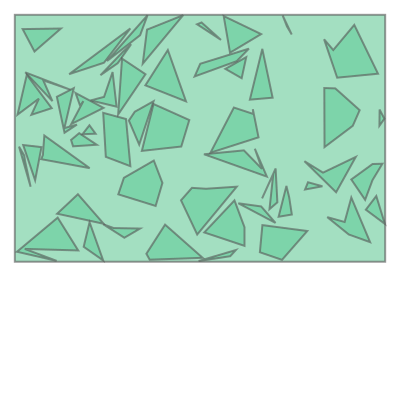

In [9]:
_packer = packer.get_packer()
df = _packer.drop_external(packer.global_optimum_position.copy())
_packer.drop_intersected(df)
print('Number of items:', len(df), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([container, *df['item']])

# Random Container

In [16]:
while True:
    container = Polygon(np.random.uniform(-10, 10, (np.random.randint(6, 10), 2)))
    if container.is_valid:
        break

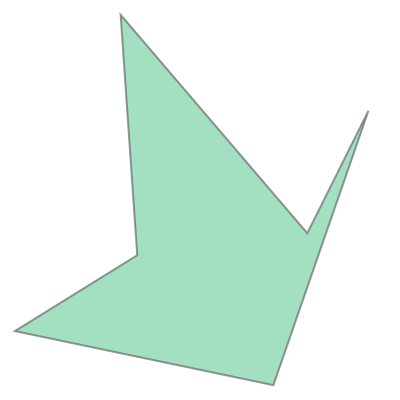

In [17]:
container

# Relaxed Circle Packing

In [20]:
%%time
packer = CirclePackerBee(container, radius, shots=5, step_portion=8)
df = packer.pack()

CPU times: user 2.09 s, sys: 18.5 ms, total: 2.11 s
Wall time: 2.19 s


Number of circles: 51 - Score: 0.671


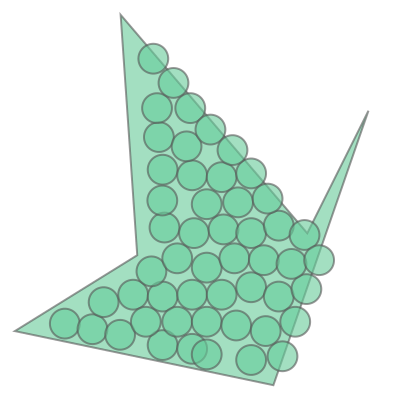

In [21]:
print('Number of circles:', len(df), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df['item']])

In [26]:
%%time
packer = CirclePackerBeeLS(container, radius, shots=5, step_portion=8, n_search=10)
df = packer.pack()

Finished first optimization step
CPU times: user 5.66 s, sys: 59.4 ms, total: 5.71 s
Wall time: 5.77 s


Number of circles: 51 - Score: 0.671


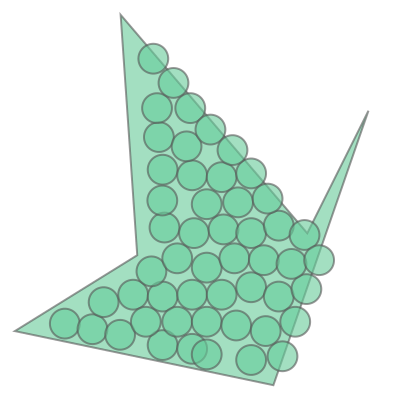

In [27]:
print('Number of circles:', len(df), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df['item']])

In [28]:
%%time
packer = CirclePackerBeeLS(container, radius, shots=5, step_portion=8, n_search=1000)
df = packer.pack()

Finished first optimization step
CPU times: user 6min 6s, sys: 4.72 s, total: 6min 11s
Wall time: 6min 12s


Number of circles: 51 - Score: 0.671


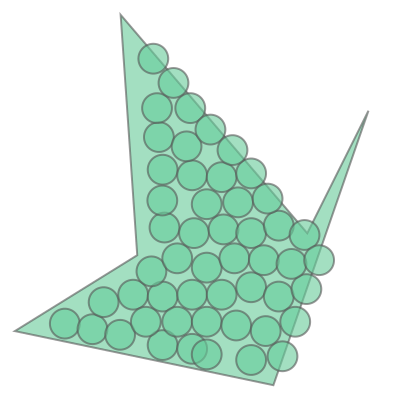

In [29]:
print('Number of circles:', len(df), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df['item']])

In [30]:
%%time
packer = CirclePackerPSO(container, radius, n_circle_iter=15, n_particles=20, n_iterations=30)
packer.pack()

CPU times: user 23min 5s, sys: 11.4 s, total: 23min 17s
Wall time: 23min 20s


Number of circles: 36 - Score: 1.222


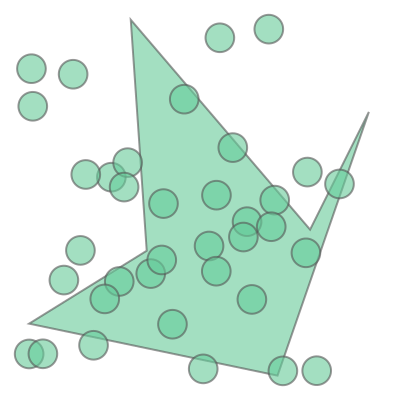

In [31]:
print('Number of circles:', len(packer.global_optimum_position), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([container, *packer.global_optimum_position['item']])

In [32]:
%%time
packer = CirclePackerPSOLS(container, radius, n_circle_iter=15, n_particles=20, n_iterations=30)
packer.pack()

CPU times: user 24min 2s, sys: 12 s, total: 24min 15s
Wall time: 24min 23s


Number of circles: 36 - Score: 1.143


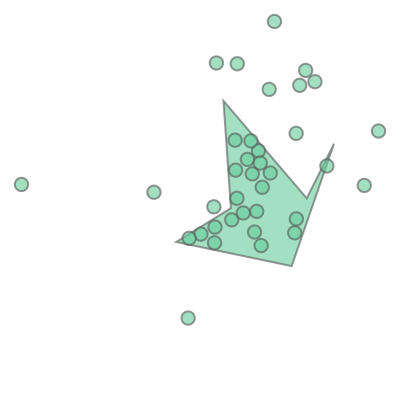

In [33]:
print('Number of circles:', len(packer.global_optimum_position), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([container, *packer.global_optimum_position['item']])

# Relaxed Irregular Score

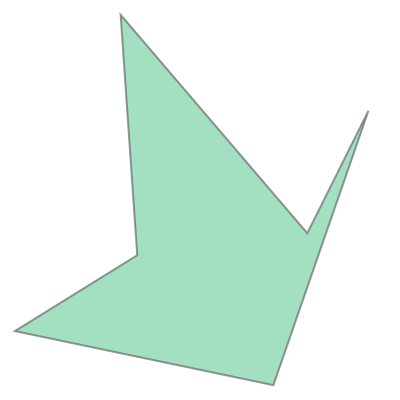

In [45]:
irregular_container = scale(container, 0.33, 0.33)
irregular_container

In [55]:
%%time
packer = IrregularPackerGridBF(irregular_container, shapes, n_rotations=1, n_neighbors=12, step_portion=16)
df = packer.pack()

CPU times: user 716 ms, sys: 5.88 ms, total: 722 ms
Wall time: 725 ms


Number of pieces: 26 - Score: 2.815


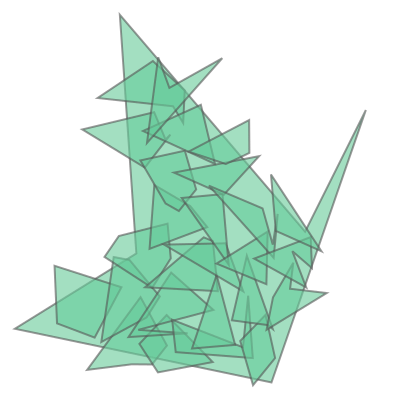

In [56]:
print('Number of pieces:', len(df), '- Score:', round(packer.score(), 3))
GeometryCollection([irregular_container, *df['item']])

In [57]:
%%time
packer = IrregularPackerGBFLS(irregular_container, shapes, n_rotations=1, n_neighbors=12, step_portion=16, n_search=50)
df = packer.pack()

Finished first optimization step
CPU times: user 32.4 s, sys: 317 ms, total: 32.7 s
Wall time: 33 s


Number of pieces: 26 - Score: 2.815


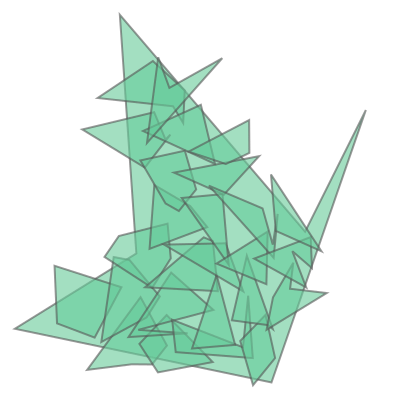

In [58]:
print('Number of pieces:', len(df), '- Score:', round(packer.score(), 3))
GeometryCollection([irregular_container, *df['item']])

In [59]:
%%time
packer = IrregularPackerPSO(irregular_container, shapes, n_particles=10, n_iterations=10)
packer.pack()

CPU times: user 2min 51s, sys: 1.85 s, total: 2min 53s
Wall time: 2min 55s


Number of pieces: 150 - Score: 5.72


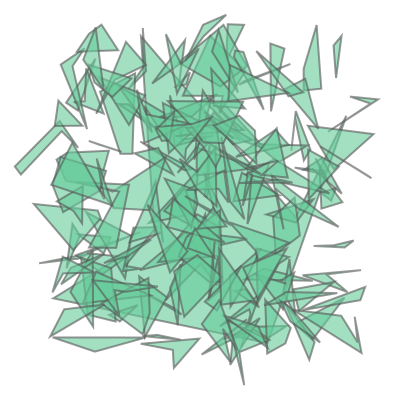

In [60]:
print('Number of pieces:', len(packer.global_optimum_position), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([irregular_container, *packer.global_optimum_position['item']])

In [61]:
%%time
packer = IrregularPackerPSOLS(irregular_container, shapes, n_particles=10, n_iterations=10)
packer.pack()

CPU times: user 2min 49s, sys: 1.84 s, total: 2min 51s
Wall time: 2min 51s


Number of pieces: 150 - Score: 5.682


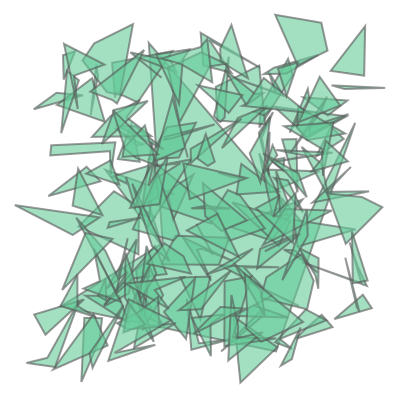

In [62]:
print('Number of pieces:', len(packer.global_optimum_position), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([irregular_container, *packer.global_optimum_position['item']])

# Strict Circles Score

In [63]:
%%time
packer = CirclePackerBeeStrict(container, radius, intersection_threshold=40, n_neighbors=8, shots=5)
df = packer.pack()

CPU times: user 36.9 s, sys: 398 ms, total: 37.3 s
Wall time: 37.4 s


Number of circles: 37 - Score: 0.471


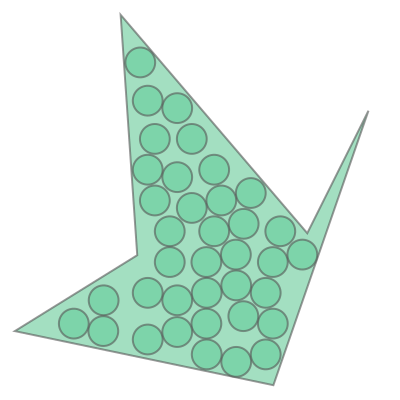

In [64]:
print('Number of circles:', len(df), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df['item']])

In [65]:
%%time
packer = CirclePackerBeeStrictLS(container, radius, intersection_threshold=40, n_neighbors=8, shots=5, n_search=100)
df = packer.pack()

Finished first optimization step
CPU times: user 57.7 s, sys: 461 ms, total: 58.2 s
Wall time: 58.3 s


Number of circles: 37 - Score: 0.471


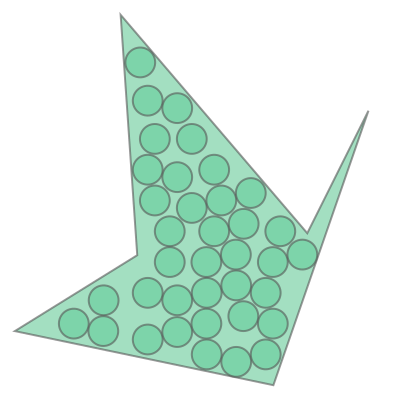

In [66]:
print('Number of circles:', len(df), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df['item']])

In [71]:
%%time
packer = CirclePackerStrictPSO(container, radius, w=0.5, n_circle_iter=15)
packer.pack()

CPU times: user 44.9 s, sys: 435 ms, total: 45.4 s
Wall time: 45.5 s


Number of circles: 17 - Score: 0.757


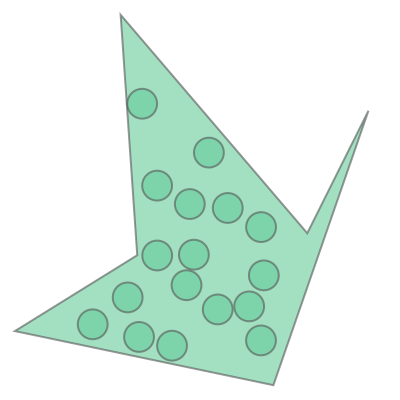

In [72]:
_packer = packer.get_packer()
df = _packer.drop_external(packer.global_optimum_position.copy())
_packer.drop_intersected(df)
print('Number of circles:', len(df), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([container, *df['item']])

In [69]:
%%time
packer = CirclePackerStrictPSOLS(container, radius, w=0.5, n_circle_iter=15)
packer.pack()

CPU times: user 1min 55s, sys: 354 ms, total: 1min 56s
Wall time: 1min 56s


Number of circles: 28 - Score: 0.6


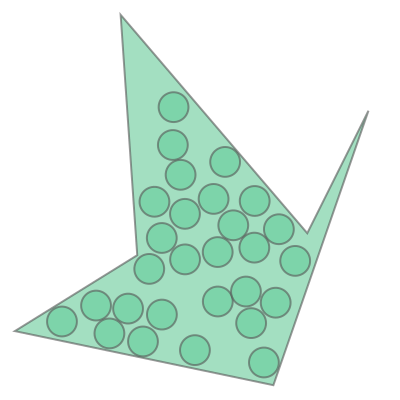

In [70]:
_packer = packer.get_packer()
df = _packer.drop_external(packer.global_optimum_position.copy())
_packer.drop_intersected(df)
print('Number of circles:', len(df), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([container, *df['item']])

# Strict Irregular Score

In [73]:
%%time
packer = IrregularPackerStrictGridBF(irregular_container, shapes, n_neighbors=10, step_portion=16, queue_length=20)
df = packer.pack()

CPU times: user 1min 26s, sys: 862 ms, total: 1min 27s
Wall time: 1min 28s


Number of included items: 8 - Score: 0.703


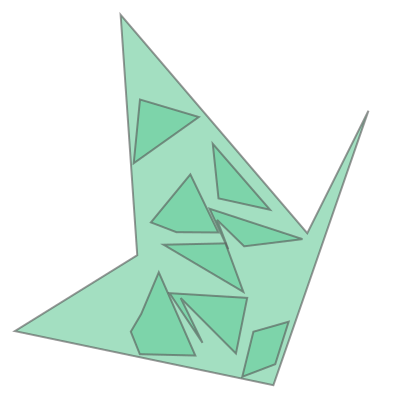

In [74]:
print('Number of included items:', len(df), '- Score:', round(packer.score(), 3))
GeometryCollection([irregular_container, *df['item']])

In [75]:
%%time
packer = IrregularPackerStrictGBFLS(irregular_container, shapes, n_neighbors=10, step_portion=16, queue_length=20,
                                    n_search=1000)
df = packer.pack()

Finished first optimization step
CPU times: user 33min 16s, sys: 18.3 s, total: 33min 34s
Wall time: 33min 44s


Number of included items: 21 - Score: 0.627


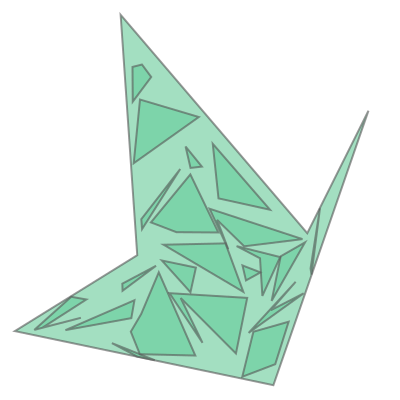

In [76]:
print('Number of included items:', len(df), '- Score:', round(packer.score(), 3))
GeometryCollection([irregular_container, *df['item']])

In [77]:
%%time
packer = IrregularPackerStrictPSO(irregular_container, shapes, w=0.5)
packer.pack()

CPU times: user 6.94 s, sys: 76.7 ms, total: 7.01 s
Wall time: 7.04 s


Number of items: 6 - Score: 0.677


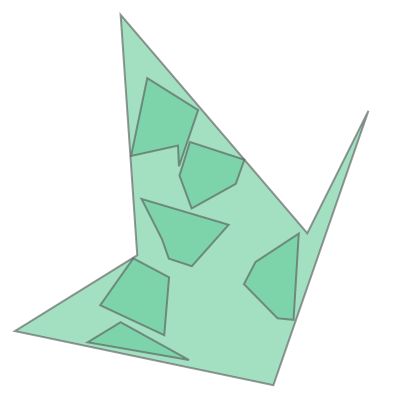

In [80]:
_packer = packer.get_packer()
df = _packer.drop_external(packer.global_optimum_position.copy())
_packer.drop_intersected(df)
print('Number of items:', len(df), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([irregular_container, *df['item']])

In [81]:
%%time
packer = IrregularPackerStrictPSOLS(irregular_container, shapes, w=0.5)
packer.particle_packer = IrregularPacker
packer.pack()

CPU times: user 1min 36s, sys: 790 ms, total: 1min 36s
Wall time: 1min 37s


Number of items: 8 - Score: 0.704


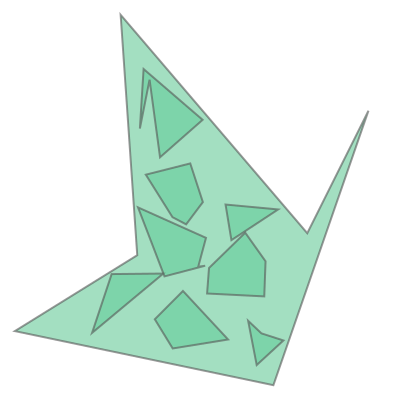

In [82]:
_packer = packer.get_packer()
df = _packer.drop_external(packer.global_optimum_position.copy())
_packer.drop_intersected(df)
print('Number of items:', len(df), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([irregular_container, *df['item']])